In [1]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import scipy.special as special
import scipy.stats as stats
import scipy as sp

# 1.- Caract. mensaje a trans

## Señal Cuadrada de 500 Hz

C:\Users\jeanc\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


(-2000, 2000)

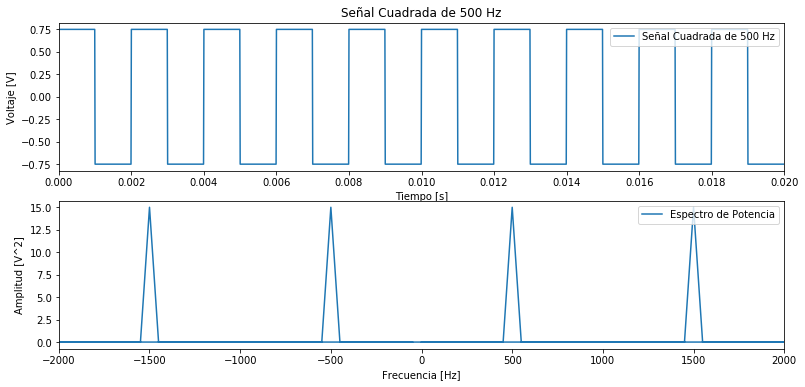

In [2]:
timestep=1/(10**5) #Periodo de Muestreo
t = np.arange(0, 0.02, timestep) #Tiempo de Muestreo
signal_500=0.75*signal.square(2*np.pi*500*t) #Señal cuadrada de 500 Hz

#Fft señal cuadrada de 500 Hz
fft500=np.fft.fft(signal_500)
fftFreq500=np.fft.fftfreq(signal_500.shape[-1],timestep)

#Grafico de señal
figure1, (ax1,ax2)=plt.subplots(2,1,figsize=(13, 6))
ax1.plot(t,signal_500, label='Señal Cuadrada de 500 Hz')
ax1.set_title('Señal Cuadrada de 500 Hz')
ax1.set_xlabel('Tiempo [s]')
ax1.set_ylabel('Voltaje [V]')
ax1.set_xlim([0,10/500])
ax1.set_xticks(np.arange(0,11/500,step=1/500))
ax1.legend(loc='upper right')

#Grafico espectro de señal
ax2.plot(fftFreq500,fft500,label='Espectro de Potencia')
ax2.set_xlabel('Frecuencia [Hz]')
ax2.set_ylabel('Amplitud [V^2]')
ax2.legend(loc='upper right')
ax2.set_xlim(-2000,2000)

# 2.- Modulacion de la Señal

## Onda de 10 kHz

C:\Users\jeanc\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


(-20000, 20000)

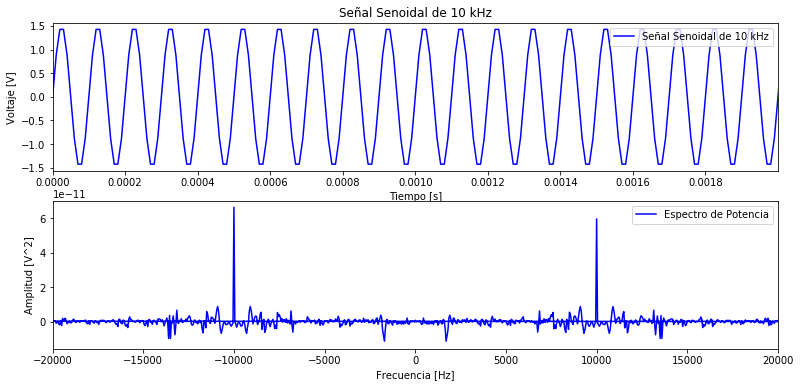

In [3]:
signal_10kHz=1.5*np.sin(2*np.pi*(10**4)*t) #Generacion de Señal sinusoidal de 10 kHz


#Fft señal cuadrada de 10kHz Hz
fft10kHz=np.fft.fft(signal_10kHz)
fftFreq10kHz=np.fft.fftfreq(signal_10kHz.shape[-1],timestep)

#Grafico de señal
figure1, (ax1,ax2)=plt.subplots(2,1,figsize=(13, 6))
ax1.plot(t,signal_10kHz,'b', label='Señal Senoidal de 10 kHz')
ax1.set_title('Señal Senoidal de 10 kHz')
ax1.set_xlabel('Tiempo [s]')
ax1.set_ylabel('Voltaje [V]')
ax1.set_xlim([0,1/500])
ax1.set_xticks(np.arange(0,1/500,2/(10**4)))
ax1.legend(loc='upper right')

#Grafico espectro de señal
ax2.plot(fftFreq10kHz,fft10kHz,'b',label='Espectro de Potencia')
ax2.set_xlabel('Frecuencia [Hz]')
ax2.set_ylabel('Amplitud [V^2]')
ax2.legend(loc='upper right')
ax2.set_xlim(-20000,20000)

## Modulacion FM

### Variacion 75 Hz

In [4]:
#Modulacion para delta=75
modulatedSignal75=np.zeros(len(t))
df75=75
for i in range(len(t)):
    modulatedSignal75[i]=1.5*np.sin(2*np.pi*(10**4)*t[i]+2*np.pi*df75*np.trapz(signal_500[0:i],dx=timestep))
    

C:\Users\jeanc\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


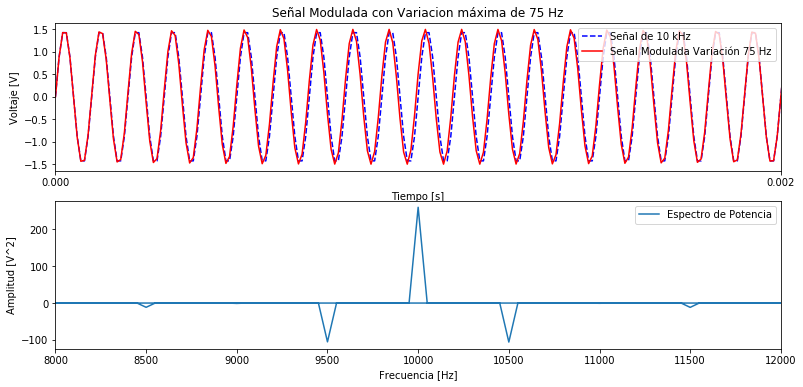

In [5]:
#Espectro frecuencia
fftMod75=np.fft.fft(modulatedSignal75)
fftFreq75=np.fft.fftfreq(modulatedSignal75.shape[-1],timestep)

figure1, (ax1,ax2) =plt.subplots(2,1,figsize=(13, 6))

#Grafico en el tiempo
ax1.plot(t,signal_10kHz,'--b',label='Señal de 10 kHz')
ax1.plot(t,modulatedSignal75,'r', label='Señal Modulada Variación 75 Hz')
ax1.set_title('Señal Modulada con Variacion máxima de 75 Hz')
ax1.set_xlabel('Tiempo [s]')
ax1.set_ylabel('Voltaje [V]')
ax1.set_xlim([0,1/500])
ax1.set_xticks(np.arange(0,2/500,step=1/500))
ax1.legend(loc='upper right')

#Grafico en Frecuencia
ax2.plot(fftFreq75,fftMod75,label='Espectro de Potencia')
ax2.set_xlabel('Frecuencia [Hz]')
ax2.set_ylabel('Amplitud [V^2]')
ax2.set_xlim([8000,12000])
ax2.legend(loc='upper right')


### Variacion 100 Hz

In [6]:
modulatedSignal100=np.zeros(len(t))
df100=100
for i in range(len(t)):
    modulatedSignal100[i]=1.5*np.sin(2*np.pi*(10**4)*t[i]+2*np.pi*df100*np.trapz(signal_500[0:i],dx=timestep))

C:\Users\jeanc\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


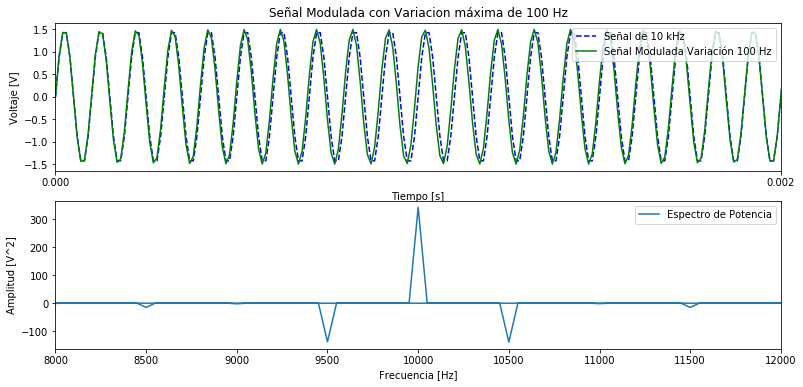

In [7]:
fftMod100=np.fft.fft(modulatedSignal100)
fftFreq100=np.fft.fftfreq(modulatedSignal100.shape[-1],timestep)

figure1, (ax1,ax2) =plt.subplots(2,1,figsize=(13, 6))

ax1.plot(t,signal_10kHz,'--b',label='Señal de 10 kHz')
ax1.plot(t,modulatedSignal100,'g', label='Señal Modulada Variación 100 Hz')
ax1.set_title('Señal Modulada con Variacion máxima de 100 Hz')
ax1.set_xlabel('Tiempo [s]')
ax1.set_ylabel('Voltaje [V]')
ax1.set_xlim([0,1/500])
ax1.set_xticks(np.arange(0,2/500,step=1/500))
ax1.legend(loc='upper right')


ax2.plot(fftFreq100,fftMod100,label='Espectro de Potencia')
ax2.set_xlabel('Frecuencia [Hz]')
ax2.set_ylabel('Amplitud [V^2]')
ax2.set_xlim([8000,12000])
ax2.legend(loc='upper right')



## Comparacion Modulaciones

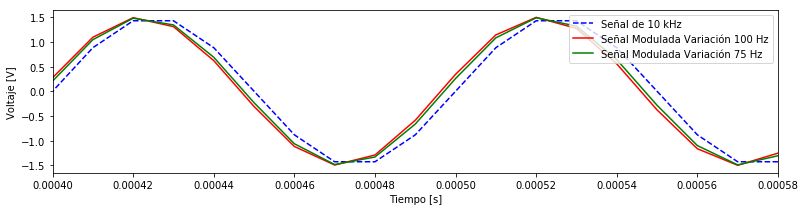

In [8]:
plt.figure(figsize=(13, 3))

plt.plot(t,signal_10kHz,'--b',label='Señal de 10 kHz')
plt.plot(t,modulatedSignal100,'r', label='Señal Modulada Variación 100 Hz')
plt.plot(t,modulatedSignal75,'g', label='Señal Modulada Variación 75 Hz')

plt.xlabel('Tiempo [s]')
plt.ylabel('Voltaje [V]')
plt.xlim(4/(10**4),5/(10**4))
plt.xticks(np.arange(4/(10**4),6/(10**4),step=0.2/(10**4)))
plt.legend(loc='upper right')
plt.show()

# Generación de Ruido

## 15 dB

### Señal con desp. de 75 Hz

In [9]:
indexPeriod=int((1/500)/timestep)
potRuidoLog75_15=((np.trapz(abs((modulatedSignal75[0:indexPeriod]**2)),dx=timestep))/(t[indexPeriod]))/(10**(15/10))
std75_15=np.sqrt(potRuidoLog75_15)
ruido75_15=np.random.normal(0,std75_15,modulatedSignal75.shape[-1])
senalRuidosa75_15=modulatedSignal75+ruido75_15
print(max(ruido75_15),min(ruido75_15))

0.7467559022568022 -0.6727914515633839


C:\Users\jeanc\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


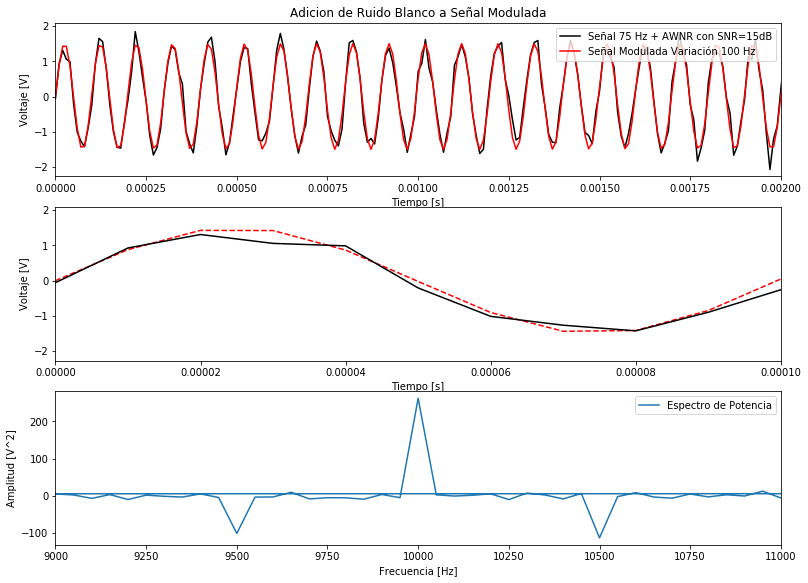

In [10]:
figure1, (ax1,ax2,ax3) =plt.subplots(3,1,figsize=(13, 9.6))


ax1.plot(t,senalRuidosa75_15,'k',label='Señal 75 Hz + AWNR con SNR=15dB')
ax1.plot(t,modulatedSignal75,'-r',label='Señal Modulada Variación 100 Hz')
ax1.set_title('Adicion de Ruido Blanco a Señal Modulada')
ax1.set_xlabel('Tiempo [s]')
ax1.set_ylabel('Voltaje [V]')
ax1.set_xlim(0,1/(500))
ax1.legend(loc='upper right')
#plt.xticks(np.arange(0,5/(10**4),step=1/(10**4)))

ax2.plot(t,modulatedSignal75,'--r',t,senalRuidosa75_15,'k')
ax2.set_xlabel('Tiempo [s]')
ax2.set_ylabel('Voltaje [V]')
ax2.set_xlim(0,1/(10**4))

fftMod75Ruid=np.fft.fft(senalRuidosa75_15)
fftFreq75Ruid=np.fft.fftfreq(modulatedSignal75.shape[-1],timestep)


ax3.plot(fftFreq75Ruid,fftMod75Ruid,label='Espectro de Potencia')
ax3.set_xlabel('Frecuencia [Hz]')
ax3.set_ylabel('Amplitud [V^2]')
ax3.set_xlim([9000,11000])
ax3.legend(loc='upper right')



### Señal con desp. de 100 Hz

In [11]:
potRuidoLog100_15=((np.trapz(abs((modulatedSignal100[0:indexPeriod])**2),dx=timestep))/(t[indexPeriod]))/(10**(15/10))
std100_15=np.sqrt(potRuidoLog100_15)
ruido100_15=np.random.normal(0,std100_15,modulatedSignal100.shape[-1])
senalRuidosa100_15=modulatedSignal100+ruido100_15
print(max(ruido100_15),min(ruido100_15))

0.663337681768564 -0.662012467359871


C:\Users\jeanc\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


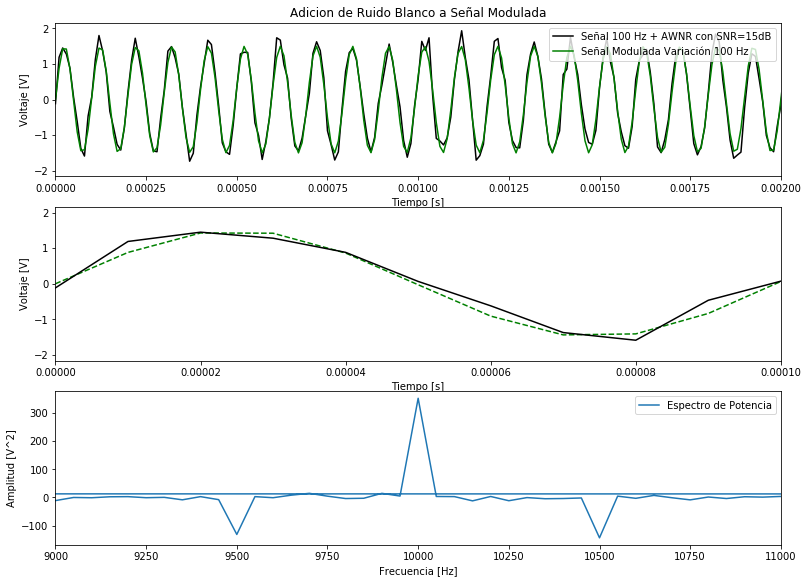

In [12]:
figure1, (ax1,ax2,ax3) =plt.subplots(3,1,figsize=(13, 9.6))


ax1.plot(t,senalRuidosa100_15,'k',label='Señal 100 Hz + AWNR con SNR=15dB')
ax1.plot(t,modulatedSignal100,'-g',label='Señal Modulada Variación 100 Hz')
ax1.set_title('Adicion de Ruido Blanco a Señal Modulada')
ax1.set_xlabel('Tiempo [s]')
ax1.set_ylabel('Voltaje [V]')
ax1.set_xlim(0,1/(500))
ax1.legend(loc='upper right')
#plt.xticks(np.arange(0,5/(10**4),step=1/(10**4)))

ax2.plot(t,modulatedSignal100,'--g',t,senalRuidosa100_15,'k')
ax2.set_xlabel('Tiempo [s]')
ax2.set_ylabel('Voltaje [V]')
ax2.set_xlim(0,1/(10**4))

fftMod100Ruid=np.fft.fft(senalRuidosa100_15)
fftFreq100Ruid=np.fft.fftfreq(modulatedSignal100.shape[-1],timestep)


ax3.plot(fftFreq100Ruid,fftMod100Ruid,label='Espectro de Potencia')
ax3.set_xlabel('Frecuencia [Hz]')
ax3.set_ylabel('Amplitud [V^2]')
ax3.set_xlim([9000,11000])
ax3.legend(loc='upper right')



## 30 dB 

### Señal modulada con desp 75 Hz

In [13]:
#Calculo potencia del Ruido
potRuidoLog75_30=((np.trapz(abs((modulatedSignal75[0:indexPeriod])**2),dx=timestep))/(t[indexPeriod]))/(10**(30/10))
#Desviacion estandar para la distrib normal
std75_30=np.sqrt(potRuidoLog75_30)
#Creacion de Vector de Ruido Blanco
ruido75_30=np.random.normal(0,std75_30,modulatedSignal75.shape[-1])
#Suma señal+Ruido
senalRuidosa75_30=modulatedSignal75+ruido75_30

C:\Users\jeanc\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


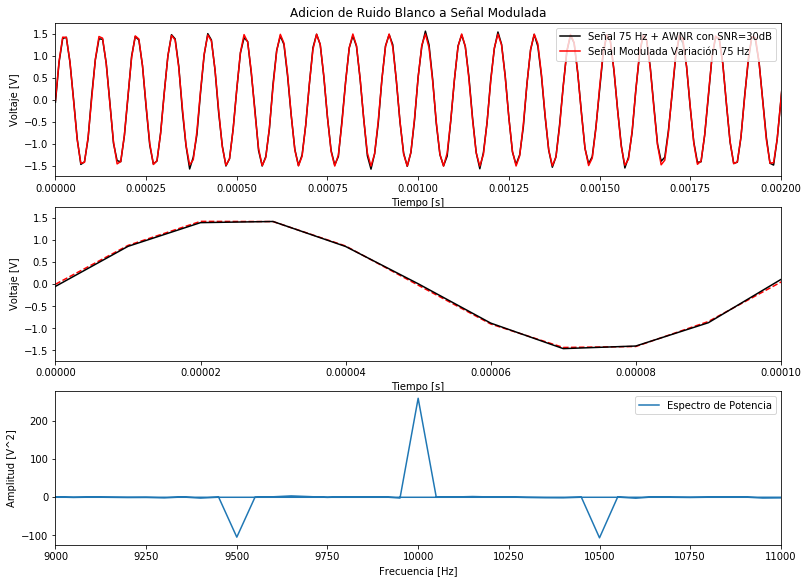

In [14]:
figure1, (ax1,ax2,ax3) =plt.subplots(3,1,figsize=(13, 9.6))


ax1.plot(t,senalRuidosa75_30,'k',label='Señal 75 Hz + AWNR con SNR=30dB')
ax1.plot(t,modulatedSignal75,'-r',label='Señal Modulada Variación 75 Hz')
ax1.set_title('Adicion de Ruido Blanco a Señal Modulada')
ax1.set_xlabel('Tiempo [s]')
ax1.set_ylabel('Voltaje [V]')
ax1.set_xlim(0,1/(500))
ax1.legend(loc='upper right')
#plt.xticks(np.arange(0,5/(10**4),step=1/(10**4)))

ax2.plot(t,modulatedSignal75,'--r',t,senalRuidosa75_30,'k')
ax2.set_xlabel('Tiempo [s]')
ax2.set_ylabel('Voltaje [V]')
ax2.set_xlim(0,1/(10**4))

fftMod75Ruid=np.fft.fft(senalRuidosa75_30)
fftFreq75Ruid=np.fft.fftfreq(modulatedSignal75.shape[-1],timestep)


ax3.plot(fftFreq75Ruid,fftMod75Ruid,label='Espectro de Potencia')
ax3.set_xlabel('Frecuencia [Hz]')
ax3.set_ylabel('Amplitud [V^2]')
ax3.set_xlim([9000,11000])
ax3.legend(loc='upper right')



### Señal modulada con desp. 100 Hz

In [15]:
potRuidoLog100_30=((np.trapz(abs((modulatedSignal100[0:indexPeriod])**2),dx=timestep))/(t[indexPeriod]))/(10**(30/10))
std100_30=np.sqrt(potRuidoLog100_30)
ruido100_30=np.random.normal(0,std100_30,modulatedSignal100.shape[-1])
senalRuidosa100_30=modulatedSignal100+ruido100_30
print(max(ruido100_30),min(ruido100_30))

0.1094503082096975 -0.12282820718605061


C:\Users\jeanc\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


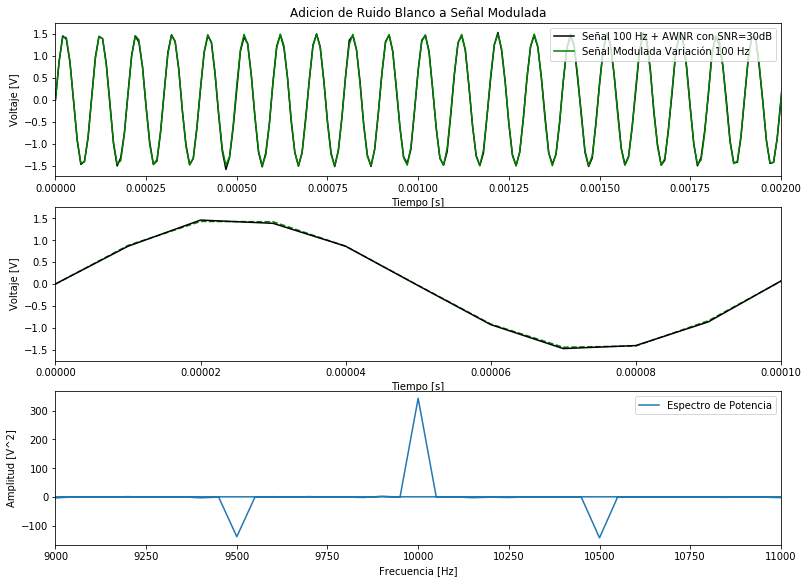

In [16]:
figure1, (ax1,ax2,ax3) =plt.subplots(3,1,figsize=(13, 9.6))


ax1.plot(t,senalRuidosa100_30,'k',label='Señal 100 Hz + AWNR con SNR=30dB')
ax1.plot(t,modulatedSignal100,'g',label='Señal Modulada Variación 100 Hz')
ax1.set_title('Adicion de Ruido Blanco a Señal Modulada')
ax1.set_xlabel('Tiempo [s]')
ax1.set_ylabel('Voltaje [V]')
ax1.set_xlim(0,1/(500))
ax1.legend(loc='upper right')
#plt.xticks(np.arange(0,5/(10**4),step=1/(10**4)))

ax2.plot(t,modulatedSignal100,'--g',t,senalRuidosa100_30,'k')
ax2.set_xlabel('Tiempo [s]')
ax2.set_ylabel('Voltaje [V]')
ax2.set_xlim(0,1/(10**4))

fftMod100Ruid=np.fft.fft(senalRuidosa100_30)
fftFreq100Ruid=np.fft.fftfreq(modulatedSignal100.shape[-1],timestep)


ax3.plot(fftFreq100Ruid,fftMod100Ruid,label='Espectro de Potencia')
ax3.set_xlabel('Frecuencia [Hz]')
ax3.set_ylabel('Amplitud [V^2]')
ax3.set_xlim([9000,11000])
ax3.legend(loc='upper right')



# Demodulacion

## Demodulacion Señal con variacion de 75 y AWGN con SNR 15 dB

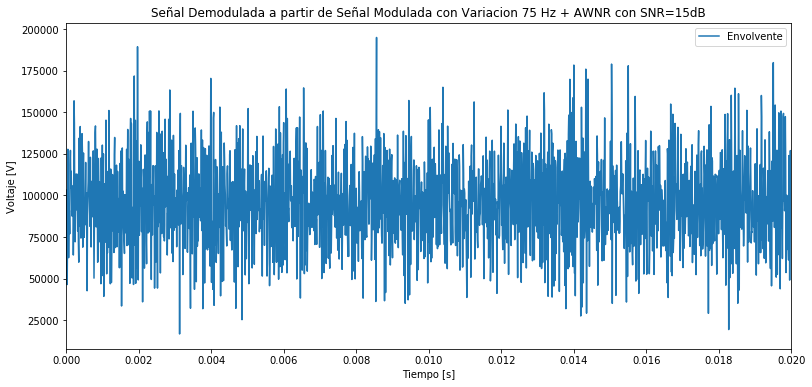

In [17]:
deriv75_15=np.diff(senalRuidosa75_15)/timestep
hilb75_15 = sp.signal.hilbert(deriv75_15)
envolv75_15 = np.abs(hilb75_15)

fig = plt.figure(figsize=(13,6))
plt.plot(t[1:], envolv75_15, label='Envolvente')
plt.title('Señal Demodulada a partir de Señal Modulada con Variacion 75 Hz + AWNR con SNR=15dB')
plt.xlim([0,10/500])
plt.xlabel("Tiempo [s]")
plt.ylabel('Voltaje [V]')
plt.xticks(np.arange(0,11/500,1/500))
plt.legend()

## Demodulacion Señal con variacion de 100 y AWGN con SNR 15 dB


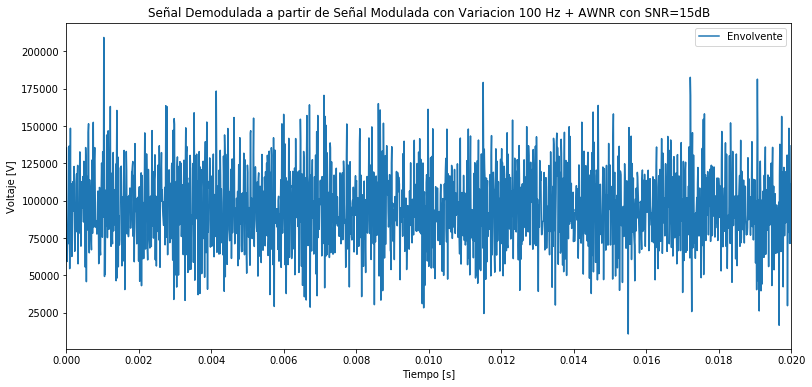

In [18]:
deriv100_15=np.diff(senalRuidosa100_15)/timestep
hilb100_15 = sp.signal.hilbert(deriv100_15)
envolv100_15 = np.abs(hilb100_15)

fig = plt.figure(figsize=(13,6))
plt.plot(t[1:], envolv100_15, label='Envolvente')
plt.title('Señal Demodulada a partir de Señal Modulada con Variacion 100 Hz + AWNR con SNR=15dB')
plt.xlim([0,10/500])
plt.xlabel("Tiempo [s]")
plt.ylabel('Voltaje [V]')
plt.xticks(np.arange(0,11/500,1/500))
plt.legend()

## Demodulacion Señal con variacion de 75 y AWGN con SNR 30 dB

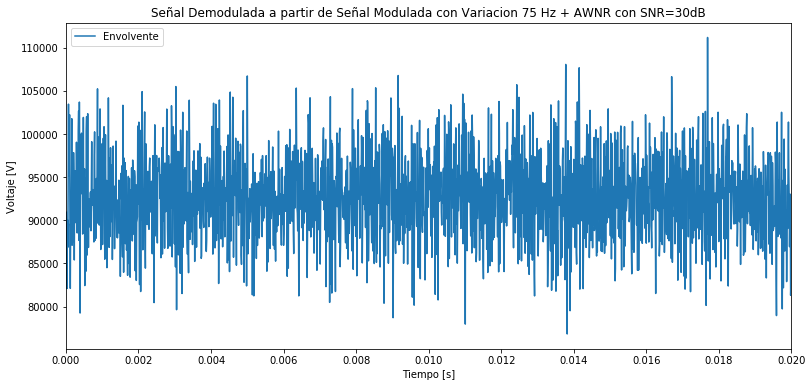

In [19]:
deriv75_30=np.diff(senalRuidosa75_30)/timestep
hilb75_30 = sp.signal.hilbert(deriv75_30)
envolv75_30 = np.abs(hilb75_30)
faseInst = np.unwrap(np.angle(hilb75_30))
freqInst = (np.diff(faseInst)/(2.0*np.pi)*1/timestep)

fig = plt.figure(figsize=(13,6))
plt.plot(t[1:], envolv75_30, label='Envolvente')
plt.title('Señal Demodulada a partir de Señal Modulada con Variacion 75 Hz + AWNR con SNR=30dB')
plt.xlim([0,10/500])
plt.xlabel("Tiempo [s]")
plt.ylabel('Voltaje [V]')
plt.xticks(np.arange(0,11/500,1/500))
plt.legend()

## Demodulacion Señal con variacion de 100 y AWGN con SNR 30 dB


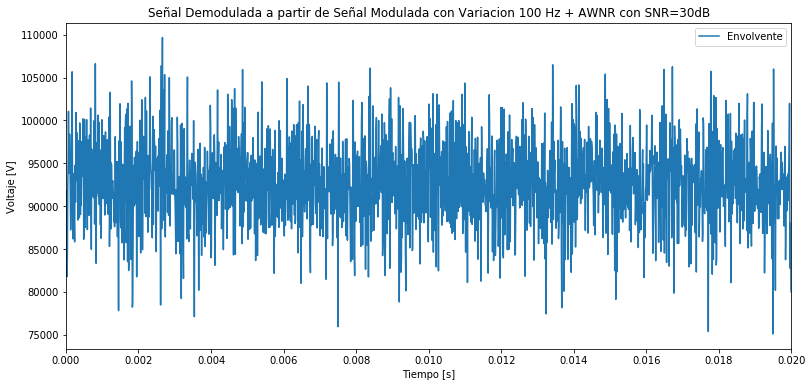

In [20]:
deriv100_30=np.diff(senalRuidosa100_30)/timestep
hilb100_30 = sp.signal.hilbert(deriv100_30)
envolv100_30 = np.abs(hilb100_30)


fig = plt.figure(figsize=(13,6))
plt.plot(t[1:], envolv100_30, label='Envolvente')
plt.title('Señal Demodulada a partir de Señal Modulada con Variacion 100 Hz + AWNR con SNR=30dB')
plt.xlim([0,10/500])
plt.xlabel("Tiempo [s]")
plt.ylabel('Voltaje [V]')
plt.xticks(np.arange(0,11/500,1/500))
plt.legend()

# Nueva Mudulacion con variacion 3000 Hz

C:\Users\jeanc\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


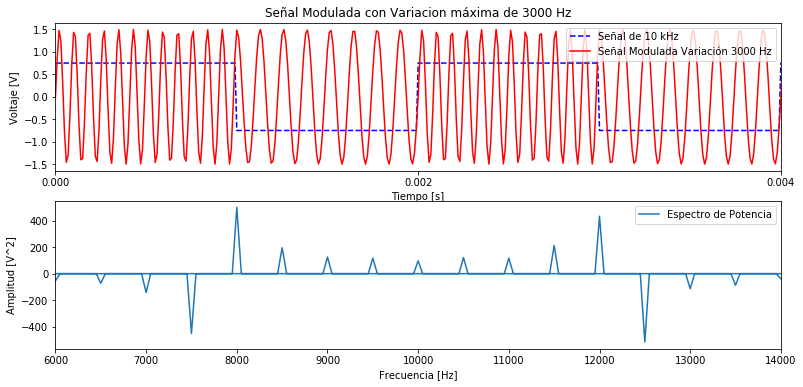

In [21]:
modulatedSignal3000=np.zeros(len(t))
df3000=3000
for i in range(len(t)):
    modulatedSignal3000[i]=1.5*np.sin(2*np.pi*(10**4)*t[i]+2*np.pi*df3000*np.trapz(signal_500[0:i],dx=timestep))

fftMod3000=np.fft.fft(modulatedSignal3000)
fftFreq3000=np.fft.fftfreq(modulatedSignal3000.shape[-1],timestep)

figure1, (ax1,ax2) =plt.subplots(2,1,figsize=(13, 6))

ax1.plot(t,signal_500,'--b',label='Señal de 10 kHz')
ax1.plot(t,modulatedSignal3000,'r', label='Señal Modulada Variación 3000 Hz')
ax1.set_title('Señal Modulada con Variacion máxima de 3000 Hz')
ax1.set_xlabel('Tiempo [s]')
ax1.set_ylabel('Voltaje [V]')
ax1.set_xlim([0,2/500])
ax1.set_xticks(np.arange(0,3/500,step=1/500))
ax1.legend(loc='upper right')

ax2.plot(fftFreq3000,fftMod3000,label='Espectro de Potencia')
ax2.set_xlabel('Frecuencia [Hz]')
ax2.set_ylabel('Amplitud [V^2]')
ax2.set_xlim([6000,14000])
ax2.legend(loc='upper right')


# Nueva Adición de Ruido

In [22]:
potRuidoLog3000_30=((np.trapz(abs((modulatedSignal3000[0:indexPeriod])**2),dx=timestep))/(t[indexPeriod]))/(10**(30/10))
std3000_30=np.sqrt(potRuidoLog3000_30)
ruido3000_30=np.random.normal(0,std3000_30,modulatedSignal3000.shape[-1])
senalRuidosa3000_30=modulatedSignal3000+ruido3000_30

# Nueva Demodulacion

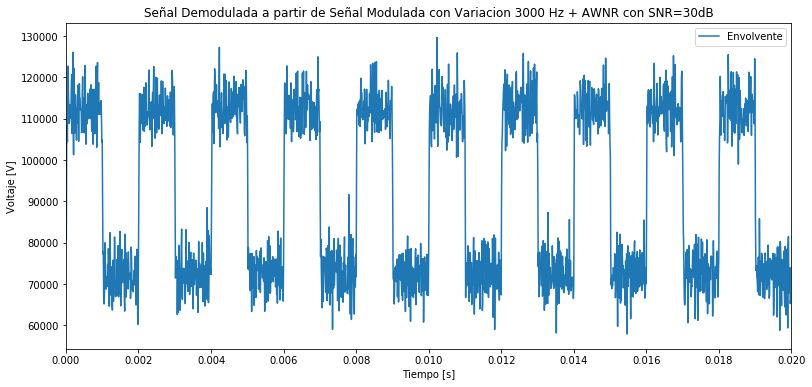

In [23]:
deriv3000_30=np.diff(senalRuidosa3000_30)/timestep
hilb3000_30 = sp.signal.hilbert(deriv3000_30)
envolv3000_30 = np.abs(hilb3000_30)

fig = plt.figure(figsize=(13,6))
plt.plot(t[1:], envolv3000_30, label='Envolvente')
plt.title('Señal Demodulada a partir de Señal Modulada con Variacion 3000 Hz + AWNR con SNR=30dB')
plt.xlim([0,10/500])
plt.xlabel("Tiempo [s]")
plt.ylabel('Voltaje [V]')
plt.xticks(np.arange(0,11/500,1/500))
plt.legend()

# Señal de Audio

In [24]:
from scipy.io.wavfile import write

originalSignalNormaliz=np.int16(signal_500/np.max(np.abs(signal_500)) * 32767)
demodSignal100_30Normaliz=np.int16(envolv100_30/np.max(np.abs(envolv100_30)) * 32767)
demodSignal3000_30Normaliz=np.int16(envolv3000_30/np.max(np.abs(envolv3000_30)) * 32767)
for i in range(10):
    originalSignalNormaliz=np.concatenate((originalSignalNormaliz,originalSignalNormaliz))
    demodSignal100_30Normaliz=np.concatenate((demodSignal100_30Normaliz,demodSignal100_30Normaliz))
    demodSignal3000_30Normaliz=np.concatenate((demodSignal3000_30Normaliz,demodSignal3000_30Normaliz))

write('originalSignal.wav', 44100, originalSignalNormaliz)
    
write('demodSignal100_30.wav', 44100, demodSignal100_30Normaliz)

write('demodSignal3000_30.wav', 44100, demodSignal3000_30Normaliz)

(0, 0.004)

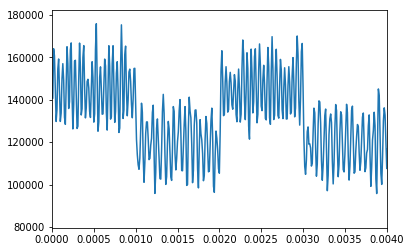

In [25]:
deriv3000_30=np.diff(senalRuidosa3000_30*signal_10kHz)/timestep
hilb3000_30 = sp.signal.hilbert(deriv3000_30)
envolv3000_30 = np.abs(hilb3000_30)



plt.plot(t[1:],envolv3000_30)
plt.xlim([0,2/500])